In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [18]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
INIT_LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 50
IMAGE_SIZE = 256
default_image_size = tuple((IMAGE_SIZE, IMAGE_SIZE))
image_size = 0
data_dir = "../../Pepper_bell_Images (copy)"
CHANNELS=3
AUTOTUNE = tf.data.AUTOTUNE

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("Pepper_bell_Images",
shuffle=True,batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE))

Found 2475 files belonging to 2 classes.


In [6]:
class_names=dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [7]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = ds.cardinality().numpy()
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [8]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

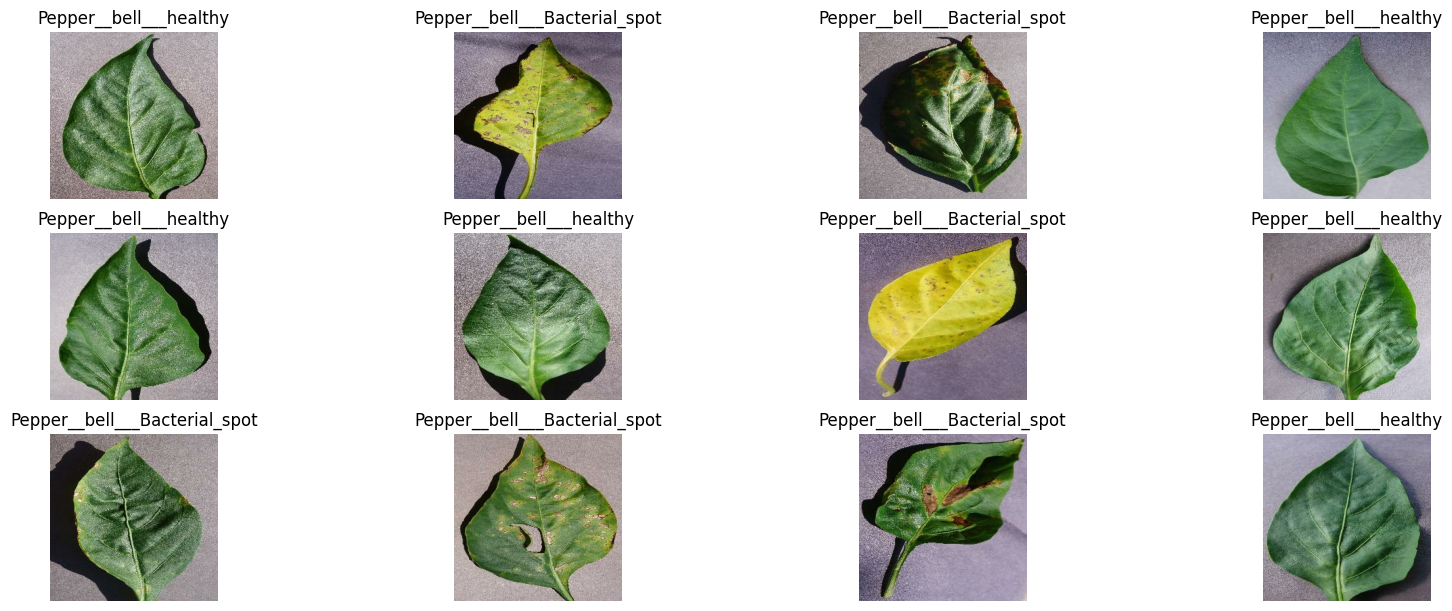

In [9]:
plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(5):
  for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [12]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [13]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)


Epoch 1/50
62/62 [==============================] - 33s 532ms/step - loss: 5.3158e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/50
62/62 [==============================] - 30s 490ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/50
62/62 [==============================] - 31s 506ms/step - loss: 6.1660e-04 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9955
Epoch 4/50
62/62 [==============================] - 29s 476ms/step - loss: 2.1288e-04 - accuracy: 1.0000 - val_loss: 2.3483e-04 - val_accuracy: 1.0000
Epoch 5/50
62/62 [==============================] - 29s 475ms/step - loss: 3.0611e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 6/50
62/62 [==============================] - 29s 475ms/step - loss: 1.4966e-04 - accuracy: 1.0000 - val_loss: 1.0119e-04 - val_accuracy: 1.0000
Epoch 7/50
62/62 [==============================] - 30s 488ms/step - loss: 6.1386e-05 - accuracy: 1.0000 - val_los

In [23]:
import os
from tensorflow.keras.models import load_model

model_folder = "../Models/"
existing_models = [f for f in os.listdir(model_folder) if f.startswith("Pepper_bell_")]
model_version = len(existing_models) + 1
model_name = f"Pepper_bell_{model_version}"

model.save(os.path.join(model_folder, model_name))


INFO:tensorflow:Assets written to: ../Models/Pepper_bell_3\assets


INFO:tensorflow:Assets written to: ../Models/Pepper_bell_3\assets
